# Importando a base de dados

https://www.kaggle.com/datasets

In [154]:
import pandas as pd

In [155]:
resenha = pd.read_csv('dados/imdb-ptbr.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


# Conhecendo a base de dados

In [156]:
print("Negativo:\n" + resenha["text_pt"][28]) # conhecer sobre os dados

Negativo:
Ah, sim, este é definitivamente um forte candidato para ganhar o prêmio questionável de "pior slasher dos anos 80 já feito". "The Prey" tem tudo que você normalmente quer evitar em um filme de terror: uma rotina, uma trama derivada que você já viu milhares de vezes antes e melhores, personagens insuportáveis ​​e performances terríveis, uma completa falta de sangue e suspense, fotografia difusa e não original. localizações e? mais irritante de todos? a maior quantidade de imagens de preenchimento inútil que você já encontrou em sua vida e isso não é um exagero, mas uma garantia !. Além da quantidade aparentemente infinita de imagens da National Geographic, que eu vou expandir mais tarde, este filme é desavergonhado o suficiente para incluir um interlúdio de banjo completo! e duas ocasiões em que os personagens contam piadas que não são nem um pouco engraçadas! A configuração é tão rudimentar quanto possível, com a introdução mostrando imagens de um incêndio florestal devastado

In [157]:
print("Positivo:\n" + resenha["text_pt"][49000]) # conhecer sobre os dados

Positivo:
Quinze anos depois e Paris Is Burning ainda está em chamas. Este é um clássico dos filmes gays negros, junto com os outros filmes homossexuais negros honorários, The Color Purple e Mahoganoy. Este trabalho seminal captura underground e underclass ou seja, "underserved cultura gay negra e latina e comunidade como nenhum outro trabalho antes ou depois, incluindo todas as retrospectivas e renderings homossexuais sentimentais do Harlem Renascimento. Eles são bons, mas este é o melhor desafio eu digo o único" Um filme real que você vai encontrar sobre o assunto. Sua implacável Cunty, a clássica música house, se torna aclamada por Hollywood, um acampamento hilariante e inimaginável, como só nós fazemos e crítica social. Tudo isso por uma diretora branca que obviamente deve ter sido uma irmã Gurl ou Mizz Thing em uma vida anterior Eu poderia continuar, mas acho que você entendeu o ponto: amo este filme!


# Adicionar coluna contendo '0' e '1' para 'neg' e 'pos'

In [158]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'],[0, 1])
classificacao.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [159]:
classificacao.tail()

49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, dtype: int64

In [160]:
resenha["classificacao"] = classificacao
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [161]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


# Quantificar dados positivos e negativos

In [162]:
print(resenha['classificacao'].value_counts())

0    24765
1    24694
Name: classificacao, dtype: int64


# importando a biblioteca do sklearn feature_extraction

In [163]:
from sklearn.feature_extraction.text import CountVectorizer

# exemplo de uso: 

In [164]:
textos = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

In [165]:
vetorizar = CountVectorizer(lowercase = False)
vetorizar

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [166]:
bag_of_words = vetorizar.fit_transform(textos)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [167]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'péssimo', 'um', 'ótimo']

### Vetorizar usando o pandas

In [168]:
vetorizado = pd.SparseDataFrame(
    bag_of_words,
    columns = vetorizar.get_feature_names()
)
vetorizado

,Assisti,filme,péssimo,um,ótimo
0,1,1,NaN,1,1.0
1,1,1,1.0,1,NaN


# Aplicando o vectorize para os dados do problema 

In [169]:
vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizar.fit_transform(resenha['text_pt'])

In [170]:
print(bag_of_words.shape)

(49459, 50)


In [171]:
vetorizar.get_feature_names()

['Eu',
 'ao',
 'apenas',
 'as',
 'com',
 'como',
 'da',
 'de',
 'do',
 'dos',
 'ela',
 'ele',
 'eles',
 'em',
 'era',
 'esse',
 'este',
 'está',
 'eu',
 'filme',
 'filmes',
 'foi',
 'história',
 'isso',
 'mais',
 'mas',
 'me',
 'muito',
 'na',
 'no',
 'não',
 'os',
 'ou',
 'para',
 'por',
 'quando',
 'que',
 'realmente',
 'se',
 'ser',
 'seu',
 'sobre',
 'sua',
 'são',
 'também',
 'tem',
 'tão',
 'um',
 'uma',
 'você']

# Separar dados entre treino e teste

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                              resenha['classificacao'],
                                                             random_state = 42)

In [174]:
print(treino.shape)
print(teste.shape)

(37094, 50)
(12365, 50)


# Aplicando um classificador - A regressão logistica

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
regressao_logistica = LogisticRegression( solver = 'lbfgs')
regressao_logistica.fit(treino, classe_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [177]:
previsao_teste = regressao_logistica.predict_proba(teste)
print(previsao_teste)

[[0.25696739 0.74303261]
 [0.72224991 0.27775009]
 [0.70076066 0.29923934]
 ...
 [0.46019618 0.53980382]
 [0.46166722 0.53833278]
 [0.61777927 0.38222073]]


# Transformar a saida da previsão em  bolean

In [178]:
previsao_teste_bol = previsao_teste[:,1] >= 0.5
print(previsao_teste_bol)

[ True False False ...  True  True False]


# Usando o numpy para transformar 'True' e 'False' em '1' e '0'

In [179]:
import numpy as np

In [180]:
previsao_teste_int = previsao_teste_bol.astype(np.int)
print(previsao_teste_int)

[1 0 0 ... 1 1 0]


# Usando o metrics do sklearn para medir a precisão

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
precisao_teste = accuracy_score(classe_teste, previsao_teste_int)
print(str((precisao_teste*100).round(2)) + "%")

65.83%


# Implementando a Word Cloud

#### instalação:

- pip install wordcloud

In [183]:
%matplotlib inline
from wordcloud import WordCloud

In [184]:
todas_palavras = ' '.join([texto for texto in resenha['text_pt']])

In [185]:
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todas_palavras)

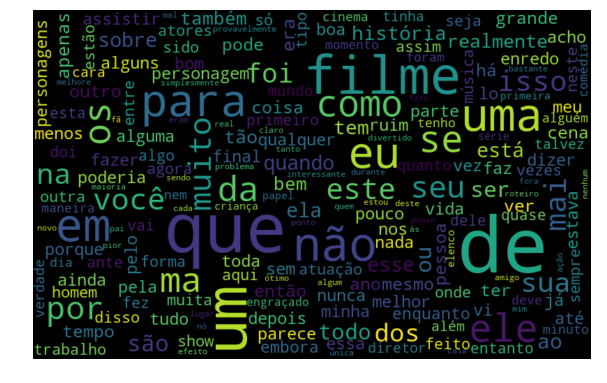

In [186]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Criando uma word cloud para resenhas positivas e negativas 

In [187]:
resenha_positiva = resenha.query("sentiment == 'pos'")
resenha_positiva.head()

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1


In [191]:
resenha_negativas = resenha.query("sentiment == 'neg'")
resenha_negativas.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [192]:
todas_palavras_positivas = ' '.join([texto for texto in resenha_positiva['text_pt']])
nuvem_palavras_positivas = WordCloud(width=800, height=500, max_font_size=110, 
                           collocations = False).generate(todas_palavras_positivas)

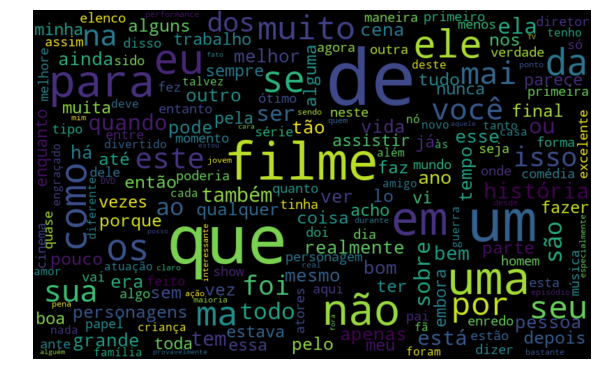

In [190]:
plt.figure(figsize = (10, 7))
plt.imshow(nuvem_palavras_positivas, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [193]:
todas_palavras_negativas = ' '.join([texto for texto in resenha_negativas['text_pt']])
nuvem_palavras_negativas = WordCloud(width=800, height=500, max_font_size=110, 
                           collocations = False).generate(todas_palavras_negativas)

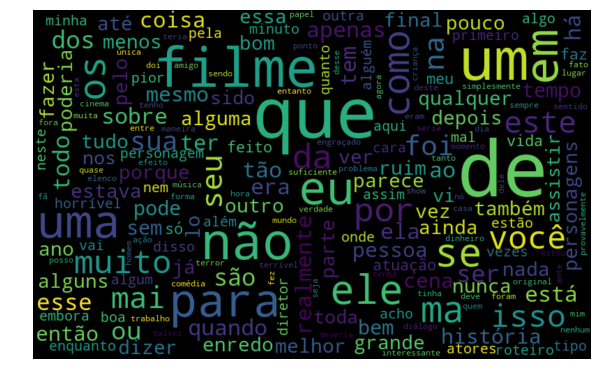

In [195]:
plt.figure(figsize = (10, 7))
plt.imshow(nuvem_palavras_negativas, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Utilizando a biblioteca NLTK

#### Instalação:
*  pip install -U nltk

# Exemplo de funcionamento

In [196]:
from nltk import tokenize

In [201]:
frase = "Bem vindo ao mundo do PLN"
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']


In [202]:
import nltk

# Calculo da frequencia das palavras

In [211]:
frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequência" : list(frequencia.values())})
df_frequencia.head()

,Palavra,Frequência
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


# Ordenando pelas maiores

In [213]:
df_frequencia = df_frequencia.nlargest(columns = 'Frequência', n = 10)
df_frequencia

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


# Frequencia das palavras positivas

In [216]:
frequencia_positivas = nltk.FreqDist(token_espaco.tokenize(todas_palavras_positivas))
df_frequencia_positivas = pd.DataFrame({"Palavra": list(frequencia_positivas.keys()), "Frequência" : list(frequencia_positivas.values())})
df_frequencia_positivas = df_frequencia_positivas.nlargest(columns = 'Frequência', n = 10)
df_frequencia_positivas

,Palavra,Frequência
10,de,208538
2,e,162543
18,que,157392
37,o,121832
52,um,108918
70,a,107385
54,é,99054
21,em,68949
152,uma,66255
131,para,62451


# Frequência das palavras negativas

In [217]:
frequencia_negativas = nltk.FreqDist(token_espaco.tokenize(todas_palavras_negativas))
df_frequencia_negativas = pd.DataFrame({"Palavra": list(frequencia_negativas.keys()), "Frequência" : list(frequencia_negativas.values())})
df_frequencia_negativas = df_frequencia_negativas.nlargest(columns = 'Frequência', n = 10)
df_frequencia_negativas

,Palavra,Frequência
20,de,209113
14,que,167678
42,e,137200
3,o,123049
7,um,107492
102,a,102794
45,é,93327
29,não,73713
1,uma,64633
116,para,64105


# Plotando num gráfico usando a biblioteca seaborn

In [218]:
import seaborn as sns

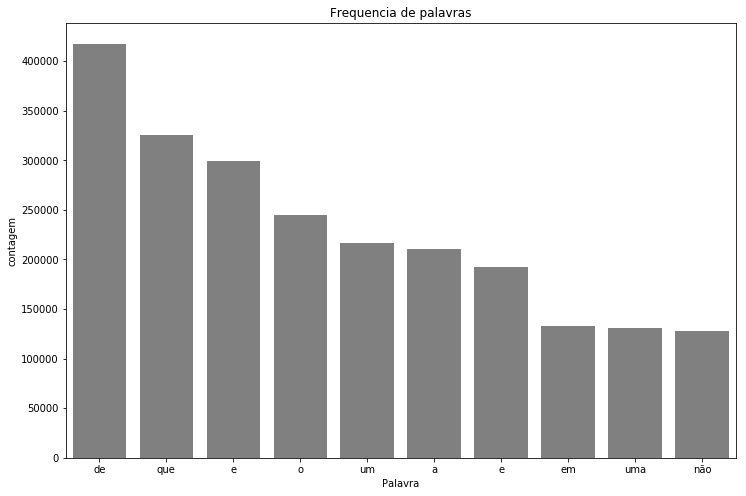

In [221]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia, x="Palavra", y="Frequência", color = 'gray')
ax.set_title("Frequencia de palavras")
ax.set(ylabel = "contagem")
plt.show()

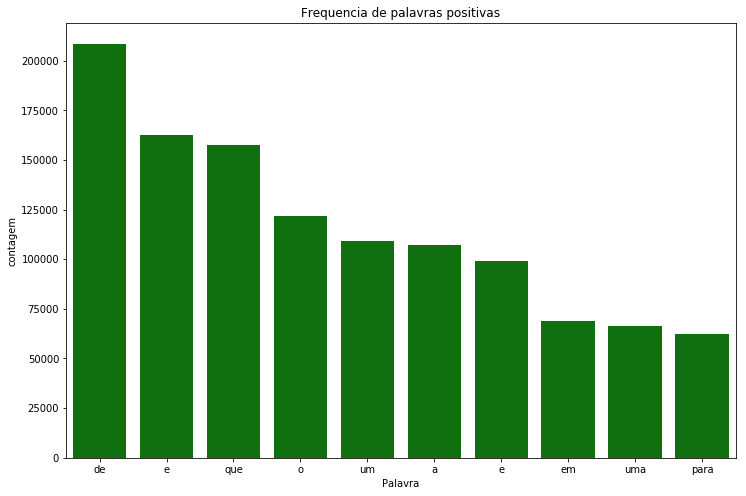

In [223]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia_positivas, x="Palavra", y="Frequência", color = 'green')
ax.set_title("Frequencia de palavras positivas")
ax.set(ylabel = "contagem")
plt.show()

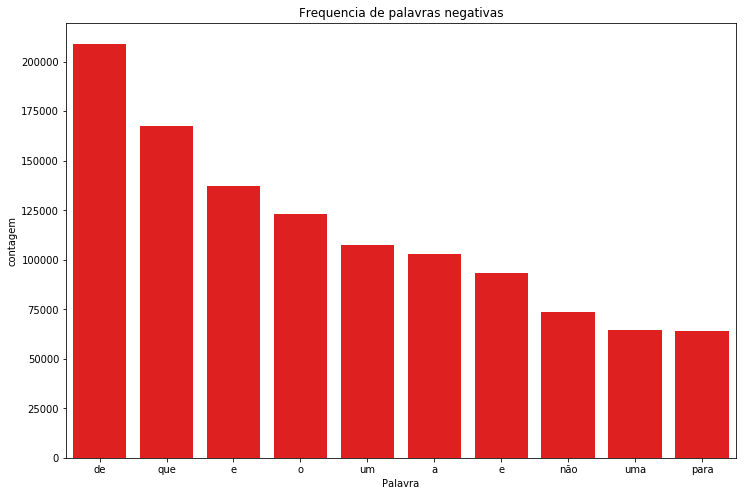

In [224]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia_negativas, x="Palavra", y="Frequência", color = 'red')
ax.set_title("Frequencia de palavras negativas")
ax.set(ylabel = "contagem")
plt.show()

# Removendo as stopword

In [227]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [228]:
print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos

In [229]:
frase_processada = list()
for opiniao in resenha['text_pt']:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha["tratamento_1"] = frase_processada

In [230]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é exemplo motivo maioria filmes ação mesm...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão é palavra apropriada eles, ..."


# Criando funções para facilitar o tratamento

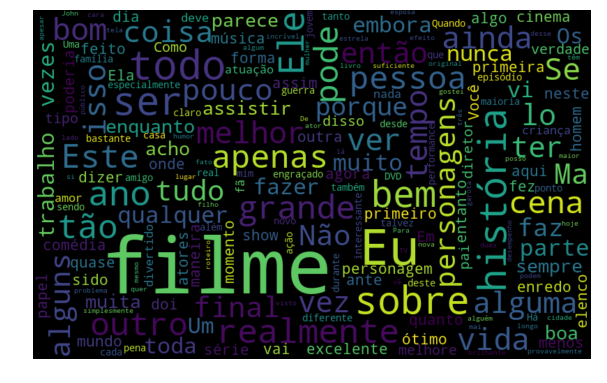

In [243]:
def nuvem_palavras(texto, coluna_texto, sentiment):
    strSentiment = "sentiment == '{}'".format(sentiment)
    texto = texto.query(strSentiment)
    
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    
    nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size=110, collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    
    
nuvem_palavras(resenha, 'tratamento_1', 'pos')    

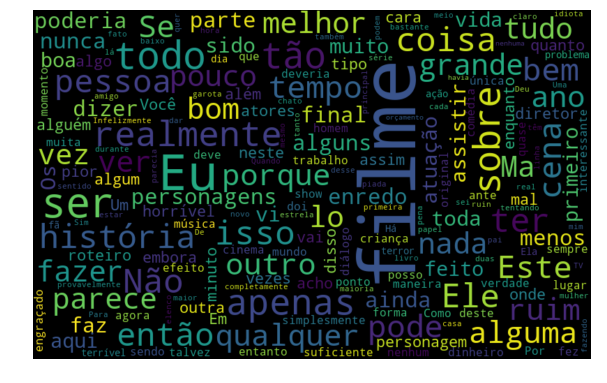

In [244]:
nuvem_palavras(resenha, 'tratamento_1', 'neg')

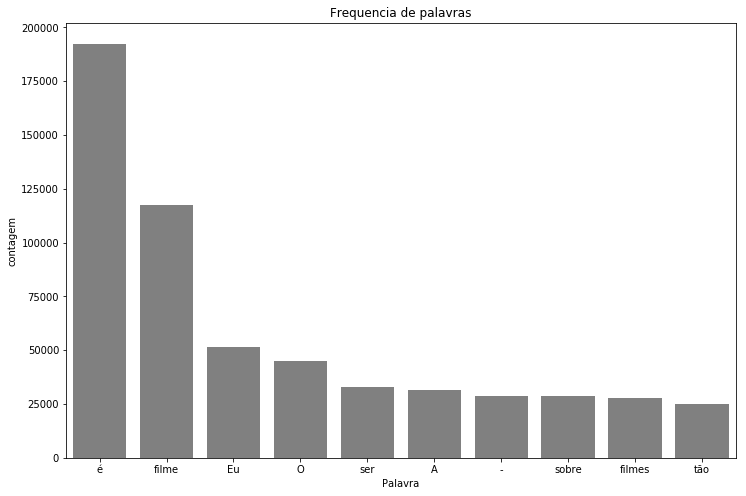

In [249]:
def pareto(texto, coluna_texto, quantidade, colorGraph):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), "Frequência":list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x="Palavra", y="Frequência", color = colorGraph)
    ax.set_title("Frequencia de palavras")
    ax.set(ylabel = "contagem")
    plt.show()
    
    
pareto(resenha, 'tratamento_1', 10, 'grey')
    

In [252]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features = 50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)
    regressao_logistica = LogisticRegression(solver = 'lbfgs')
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
precisao_teste = classificar_texto(resenha, 'tratamento_1', 'classificacao')
print(str((precisao_teste*100).round(2)) + "%")

66.07%
